In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(42000, 785)

In [11]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [13]:
Xtrain = X[:-1000]
ytrain = Y[:-1000]
Xtest = X[-1000:]
ytest = Y[-1000:]

In [14]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((41000, 784), (41000,), (1000, 784), (1000,))

In [15]:
mu = Xtrain.mean(axis=0)
sigma = Xtrain.std(axis=0)
for i in range(len(sigma)):
    if sigma[i] == 0.0:
        sigma[i] = 1.0

In [16]:
Xtrain_norm = (Xtrain - mu)/(sigma)
Xtest_norm = (Xtest - mu)/(sigma)

In [17]:
Xtrain_norm

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
40996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
40997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0
40998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034713,-0.024771,-0.016983,-0.011392,-0.009209,-0.006981,0.0,0.0,0.0,0.0


In [18]:
ytrain_norm = y2indicator(ytrain)
ytest_norm = y2indicator(ytest)

In [27]:
w = train_logistic_regression(Xtrain_norm, ytrain_norm, max_iter=500, learning_rate=0.1, fit_intercept=True)

0.2402446289080311
0.05720383047735054
0.05099405852500397
0.04817117263712326
0.04644005172051218


In [107]:
np.round(predict(Xtest_norm.iloc[:10],w),1)

array([2, 8, 1, 8, 0, 1, 3, 8, 1, 0], dtype=int64)

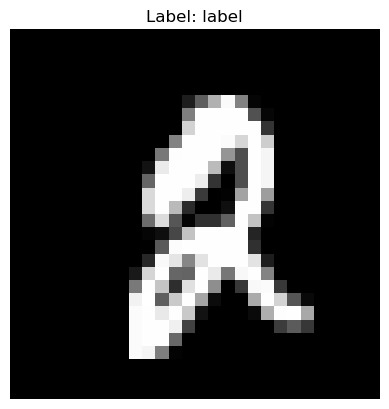

In [170]:
print_mnist_data(np.array(Xtest.iloc[20]), 'label')

In [155]:
weights_reg = train_logistic_regression_regularization(Xtrain_norm, ytrain_norm, max_iter=500, learning_rate=0.1, lambda_=1.0, fit_intercept=True)

0.24024483434207108
0.05721827886228689
0.05101498376039854
0.048197229336045415
0.046470820008749386


In [156]:
P_reg = np.round(predict(Xtest_norm,weights_reg),1)

In [161]:
print('Train Accuracy: %.1f %%' % (np.mean(P_reg == ytest) * 100))

Train Accuracy: 91.2 %


In [162]:
P = np.round(predict(Xtest_norm, w),1)

In [163]:
print('Train Accuracy: %.1f %%' % (np.mean(P == ytest) * 100))

Train Accuracy: 91.2 %


In [165]:
ytest[P_reg != ytest]

41020    2
41030    4
41035    7
41047    5
41061    8
        ..
41892    7
41914    9
41935    3
41942    5
41947    4
Name: label, Length: 88, dtype: int64

# Logistic Regression on scikit learn

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Binary Classification

In [20]:
binary_df = df[df['label'] < 2]

In [21]:
Xtrain_b = binary_df.drop(columns='label')
Ytrain_b = binary_df['label']

In [22]:
Xtest_b = Xtrain_b[-1000:]
Ytest_b = Ytrain_b[-1000:]
Xtrain_b = Xtrain_b[:-1000]
Ytrain_b = Ytrain_b[:-1000]

In [23]:
mu = Xtrain_b.mean(axis=0)
sigma = Xtrain_b.std(axis=0)
for i in range(len(sigma)):
    if sigma[i] == 0.0:
        sigma[i] = 1.0
Xtrain_b_norm = (Xtrain_b - mu)/(sigma)
Xtest_b_norm = (Xtest_b - mu)/(sigma)

In [24]:
model = LogisticRegression(penalty=None) #No panalties as we are training without regularization
model.fit(Xtrain_b_norm, Ytrain_b)
prediction_b = model.predict(Xtest_b_norm)
accuracy_score(Ytest_b, prediction_b)

1.0

In [26]:
model.coef_.shape

(1, 784)

#### MultiClass Classification

In [27]:
model = LogisticRegression(penalty = None)
model.fit(Xtrain_norm, ytrain)

c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [28]:
prediction_multi = model.predict(Xtest_norm)
accuracy_score(ytest, prediction_multi)

0.908

In [29]:
accuracy_score(ytrain, model.predict(Xtrain_norm)) #training error

0.9512195121951219

Parameters:
- C: Regularization strength. Smaller value means stronger regularization
- penalty: Type of regularization that we want to implement l1, l2, elasticnet
- solver

In [49]:
model = LogisticRegression(penalty = 'l2', C=0.01)
model.fit(Xtrain_norm, ytrain)

c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [50]:
train_score = accuracy_score(ytrain, model.predict(Xtrain_norm))
test_score = accuracy_score(ytest, model.predict(Xtest_norm))

In [51]:
print("Training Accuracy: {}, Testing Accuracy: {}".format(train_score, test_score))

Training Accuracy: 0.9382682926829268, Testing Accuracy: 0.916


In [54]:
print(confusion_matrix(ytest, model.predict(Xtest_norm)))

[[ 89   0   1   0   0   0   1   0   1   0]
 [  0 124   1   0   0   0   0   0   1   1]
 [  1   0  87   3   0   0   0   2   4   0]
 [  0   1   3  81   0   2   3   2   1   2]
 [  0   1   2   0 101   0   1   1   3   2]
 [  3   3   3   0   2  69   0   0   3   2]
 [  2   0   1   0   0   0 100   0   0   0]
 [  0   0   1   0   2   0   0  96   0   2]
 [  0   3   1   3   0   1   1   0  78   1]
 [  1   0   0   1   3   0   0   5   0  91]]


# Logistic Regression with GridSearch, RepeatedStratifiedKFold

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {'C': [0.01, 0.1, 1, 10]}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression(multi_class='multinomial')

In [62]:
std_scale = StandardScaler(with_mean=False, with_std=False)

In [63]:
n_folds=5
n_repeats=5

In [64]:
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

In [ ]:
log_clf = GridSearchCV(estimator=log_reg, cv=rskfold, return_train_score=True,param_grid=param_grid, refit='Accuracy')
log_clf.fit(Xtrain_norm, ytrain)
results = log_clf.cv_results_

In [79]:
print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

best params: LogisticRegression(C=0.01, multi_class='multinomial')
best params: {'C': 0.01}
best score: 0.9214975609756099


Questions:

1) Different Solver in Logistic Regression
2) Different type of regularization: l1, l2, elastic net
3) What is tolerance and how it is impacting the convergence?


# Comparison of different regularization on Logistic regression

C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                28.12%
Sparsity with Elastic-Net penalty:       15.62%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


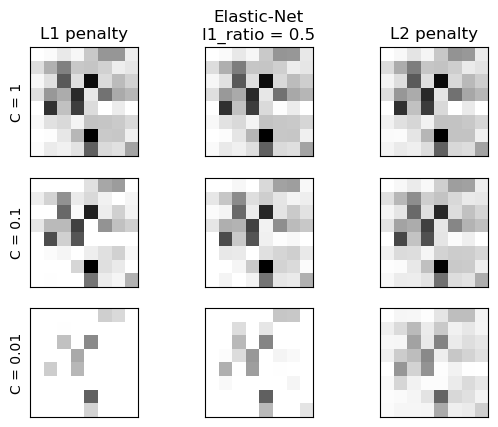

In [87]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Sparsity with L1 penalty: 81.34%
Test score with L1 penalty: 0.8325
Example run in 66.677 s


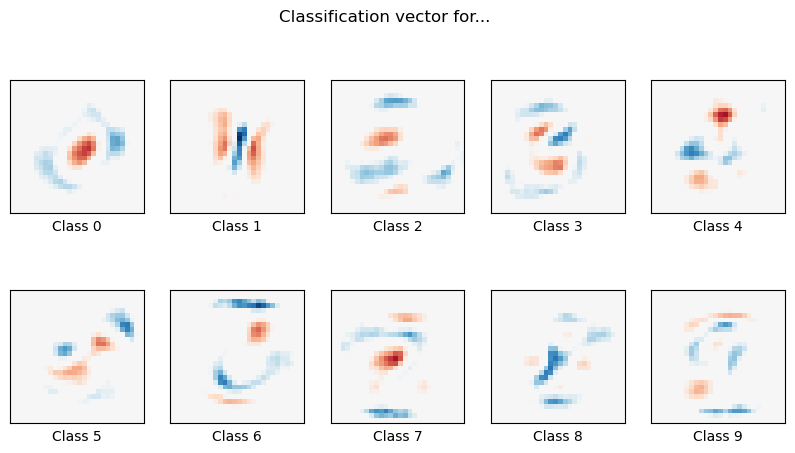

In [88]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()